# Exploratory Analysis on which cities has the most volatile markets

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Loading cleaned dataframe
df = pd.read_csv('clean_median_sale_price_v2_df.csv')
df.head()

,RegionName,StateName,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,"398,667.00","398,667.00","401,667.00","408,000.00","414,667.00","413,000.00","401,667.00","387,080.00",...,"543,333.00","528,333.00","518,333.00","515,333.00","509,500.00","510,333.00","516,667.00","535,833.00","558,333.00","579,667.00"
1,"Los Angeles, CA",CA,"498,333.00","495,000.00","490,333.00","480,333.00","467,000.00","452,667.00","441,000.00","426,000.00",...,"852,000.00","840,333.00","827,000.00","818,333.00","816,667.00","827,333.00","839,000.00","854,000.00","873,333.00","888,333.00"
2,"Chicago, IL",IL,"230,833.00","233,333.00","236,667.00","241,667.00","243,667.00","236,583.00","229,917.00","221,250.00",...,"285,000.00","278,333.00","273,333.00","270,000.00","269,000.00","275,633.00","287,300.00","300,300.00","313,167.00","319,833.00"
3,"Dallas, TX",TX,"142,563.00","146,863.00","149,633.00","152,800.00","152,833.00","147,833.00","143,333.00","137,983.00",...,"390,500.00","382,500.00","373,333.00","363,333.00","362,333.00","367,000.00","377,000.00","384,667.00","395,000.00","400,333.00"
4,"Houston, TX",TX,"143,575.00","145,275.00","149,275.00","152,333.00","153,333.00","151,633.00","144,733.00","136,742.00",...,"321,000.00","316,000.00","310,667.00","306,000.00","304,333.00","306,333.00","313,333.00","321,667.00","328,667.00","333,667.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Columns: 186 entries, RegionName to 7/31/2023
dtypes: object(186)
memory usage: 548.0+ KB


In [5]:
# Convert values to Numeric
df = df.fillna(0)
for column in df.columns[2:]:
    df[column] = df[column].str.replace(",", "")
    df[column] = df[column].str.replace(".", "")
    df[column] = pd.to_numeric(df[column])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Columns: 186 entries, RegionName to 7/31/2023
dtypes: float64(11), int64(173), object(2)
memory usage: 548.0+ KB


In [7]:
df.head()

,RegionName,StateName,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,39866700,39866700,40166700,40800000,41466700,41300000,40166700,38708000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,49833300,49500000,49033300,48033300,46700000,45266700,44100000,42600000,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,23083300,23333300,23666700,24166700,24366700,23658300,22991700,22125000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,14256300,14686300,14963300,15280000,15283300,14783300,14333300,13798300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14357500,14527500,14927500,15233300,15333300,15163300,14473300,13674200,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [8]:
df.to_csv('clean_median_sale_price_v2_df.csv')

In [57]:
# Getting differences
difference_df = df.iloc[:, 2:].diff(axis=1)
difference_df = difference_df.drop("4/30/2008", axis=1)
difference_df

# Sample for accuracy
ny_sample = difference_df.iloc[0,:]
print(ny_sample)

5/31/2008          0.0
6/30/2008     300000.0
7/31/2008     633300.0
8/31/2008     666700.0
9/30/2008    -166700.0
               ...    
3/31/2023      83300.0
4/30/2023     633400.0
5/31/2023    1916600.0
6/30/2023    2250000.0
7/31/2023    2133400.0
Name: 0, Length: 183, dtype: float64


In [99]:
pct_df = df.iloc[:, 2:].pct_change(axis=1)
pct_df = pct_df.drop("4/30/2008", axis=1)
pct_df = pct_df.pivot(columns=
new_york = pct_df.iloc[1,2:]


KeyError: "None of ['all'] are in the columns"

<Axes: >

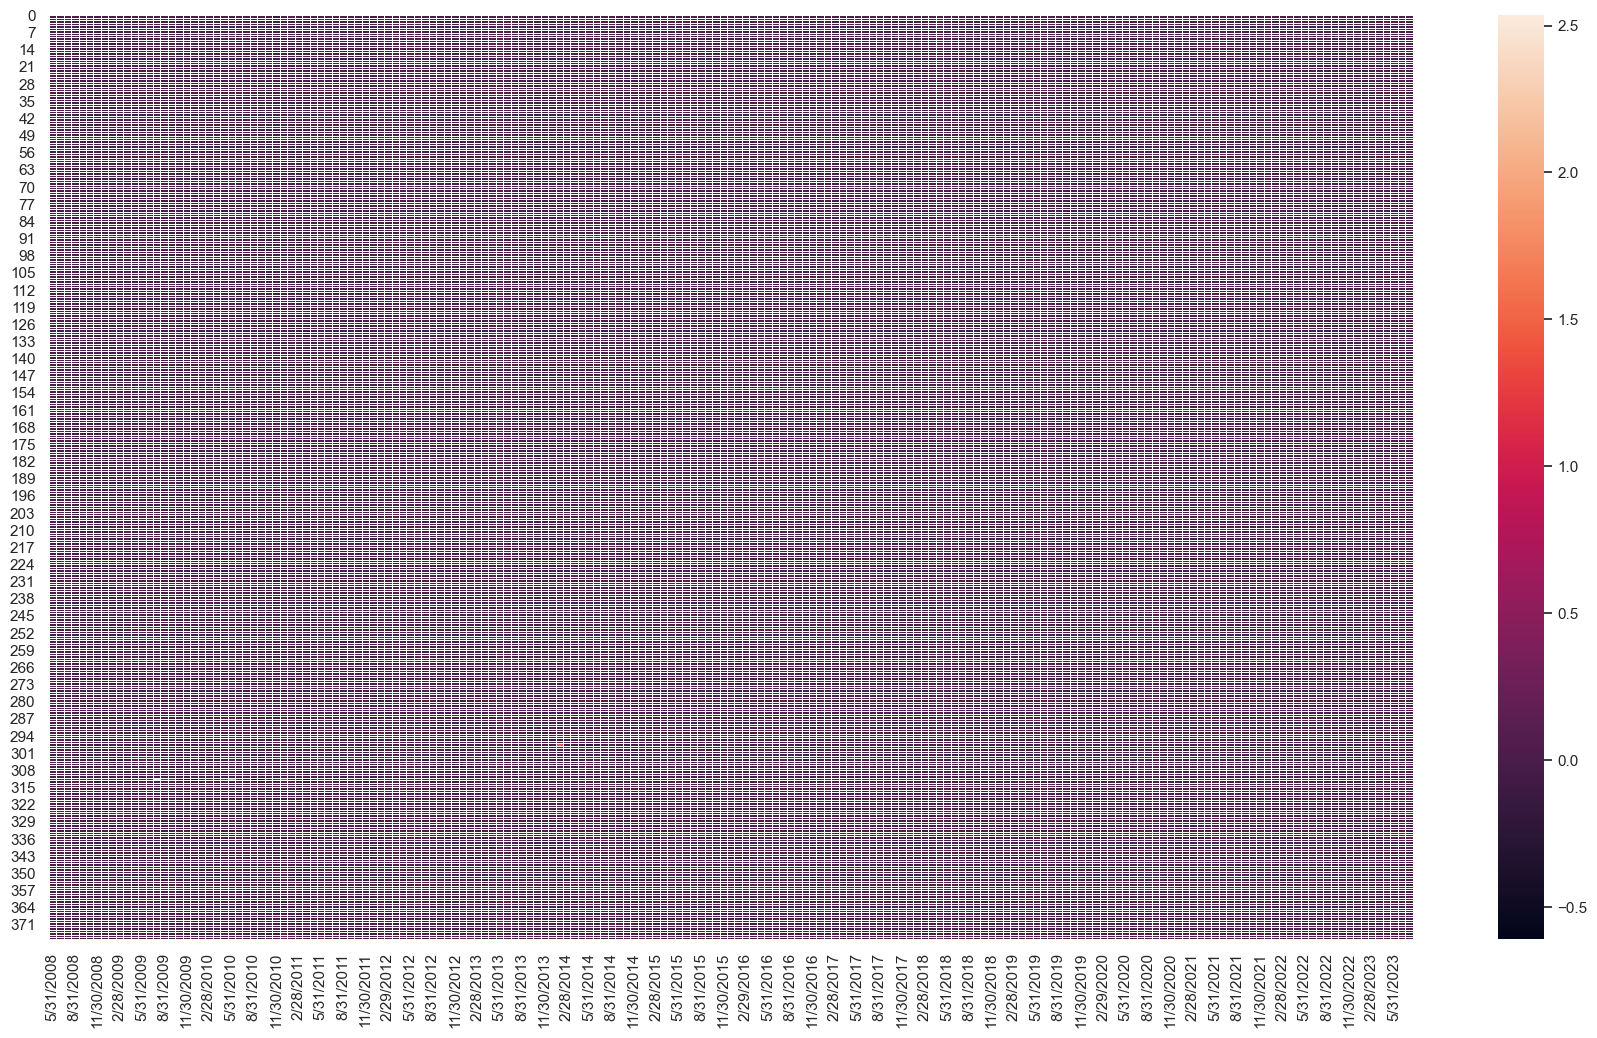

In [100]:
# Draw a heatmap with the numeric values in each cell
sns.set_theme()
f, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(pct_df, fmt="d", linewidths=.5, ax=ax)